<img src="https://pbs.twimg.com/profile_images/1523691369763684357/FPimkdzj_400x400.jpg" align="right" style="float" width="200">
<font color="#0096d2"><h1 align="left">Datamecum: Programa técnico intensivo en data science.</h1></font>
<font color="#00628a"><h2 align="left">Módulo No supervisado</h2></font>
<font color="#00628a"><h2 align="left">Anomalías en Imágenes con Distancias</h2></font>

Vamos a aprender a trabajar con imágenes.
Calculamos las distancia entre sus píxeles para encontrar cual es el más anómalo.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


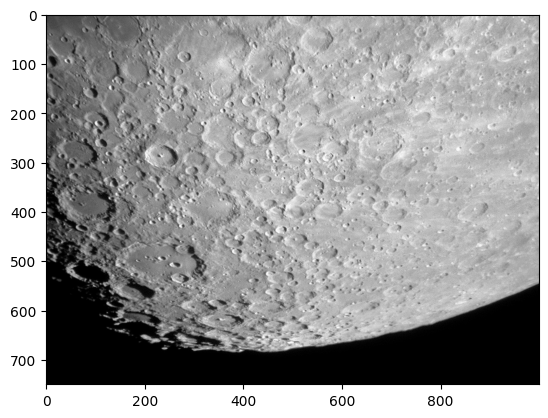

In [10]:
# read the image
# im = io.imread('https://skynews.ca/wp-content/uploads/2019/11/Seronik-Jan12-03-32.jpg')

im = io.imread('/content/drive/MyDrive/Datamecum/PSD3/Anomalias/data/descarga2.jpeg')

# show the image
plt.imshow(im)

In [11]:
# Calcula el tamaño de la imagen, ¿qué indica sus dimensiones?
im.shape


(750, 1000, 3)

(200, 200, 3)


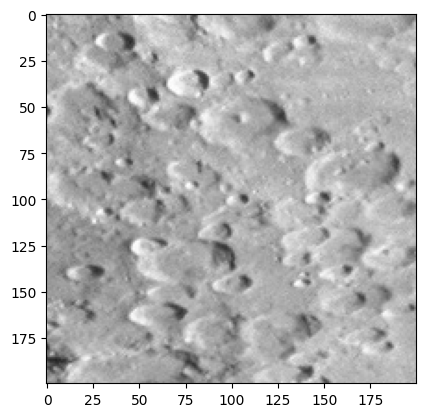

In [12]:
# reducimos tamaño de la imagen para reducir coste de cálculos

im = im[400:600, 400:600, :]

print(im.shape)
plt.imshow(im)

Hemos recortado nuestra imagen a dimensiones x=200 píxels, y = 200 píxels y z = 3 canales de imagen (R,G,B).

## Cálculo de distancias

Ahora vamos a 'partir' nuestra imagen en cuadrados de 8 píxeles

In [14]:
# si tomamos la dimensión x de nuestra imagen, ¿cuántos cuadrados de 8 píxeles tengo?

im.shape[1]/8

25.0

In [16]:
np.arange(0,im.shape[1],8)

array([  0,   8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96,
       104, 112, 120, 128, 136, 144, 152, 160, 168, 176, 184, 192])

In [15]:
# lo mismo para el eje y
im.shape[0]/8

25.0

-> 200/8 = 25 cuadrados en cada dimensión (2D -> 25*25!)

-> tiene 25x25 en las tres dimensiones de la imagen!

In [34]:
# cogemos la imagen y la troceamos en cuadraditos de 8 (8x8x3)

Cord = [] # matriz coordenadas de los datos
Dato = [] # valor de los píxeles de mi cuadrado

# calcula los cuadrados
for i in np.arange(0,im.shape[1],8):
  for j in np.arange(0,im.shape[0],8):

    Dato.append(im[i:i+8,j:j+8,:].flatten())
    Cord.append([i,j])

# comprobamos las dimensiones (8x8x3 = 192)

print(Dato[0].shape)
print(len(Dato))
print(len(Cord))

(192,)
625
625


In [35]:
# ¿qué tipo de estructura es Dato? quiero pasar todos los datos de la imagen a array para poder calcular

Dato = np.array(Dato)
Dato

array([[176, 176, 176, ..., 158, 158, 158],
       [200, 200, 200, ..., 176, 176, 176],
       [189, 189, 189, ..., 165, 165, 165],
       ...,
       [167, 167, 167, ..., 185, 185, 185],
       [184, 184, 184, ..., 183, 183, 183],
       [181, 181, 181, ..., 186, 186, 186]], dtype=uint8)

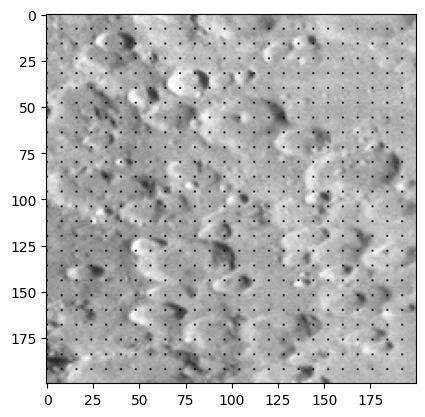

In [36]:
# Vamos a visualizar lo que acabamos de hacer!

im_map = im.copy()

# Pintamos las coordenadas de las líneas que hemos dibujado sobre im_map
for i, j in Cord:
  im_map[i,j] = 0


plt.imshow(im_map)

In [39]:
# Calcula las distancias Lp entre dos patches.

# quiero calcular la distancia
D = np.zeros((Dato.shape[0],Dato.shape[0]))  # matriz de distancias
d = np.zeros((Dato.shape[0],))   # "matriz" para distancia del vecino
p = 2

for i in range(0,Dato.shape[0]):
    for j in range(0,Dato.shape[0]):
        D[i,j] = (np.sum(np.abs(Dato[i,:]-Dato[j,:])**p))**(1/p)

    aux = D[i,:]
    aux[i] = np.max(D[i,:])+1
    d[i] = np.min(aux)



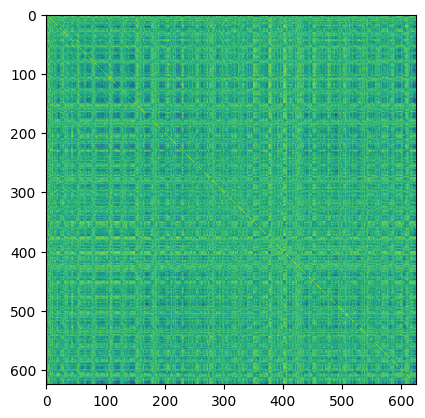

In [40]:
# pinta las matrices de distancias D y d

plt.imshow(D)

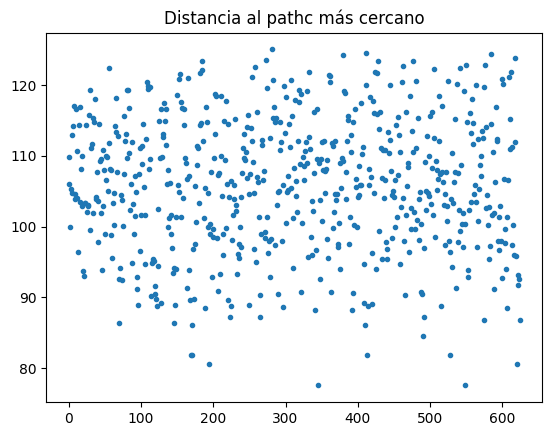

In [45]:
plt.plot(d,'.')
plt.title('Distancia al pathc más cercano')
plt.show()

In [46]:
np.argmax(d)

281

In [47]:
d[281]

125.01999840025594

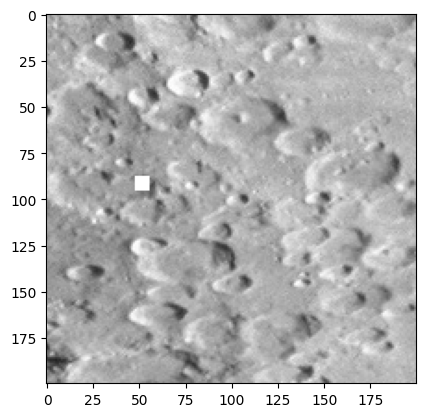

In [48]:
# Encuentra el patch más anómalo (mayor distancia)

im_an = im.copy()
im_an[Cord[np.argmax(d)][0]:Cord[np.argmax(d)][0]+8, Cord[np.argmax(d)][1]:Cord[np.argmax(d)][1]+8, :] = 255

plt.imshow(im_an)

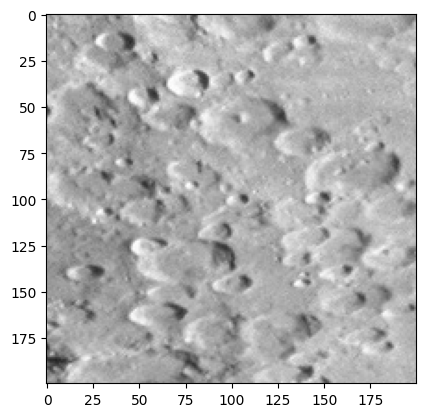

In [49]:
plt.imshow(im)

## Ejercicios

In [ ]:
# Calcula la distancia de mahalanobis entre dos patches.

#

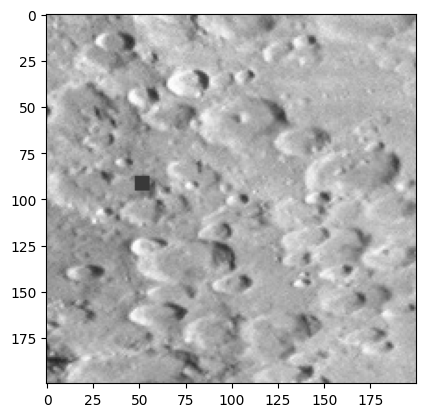

In [53]:
# Introduce una anomalía y calcula si sería más anómala


im_an[Cord[np.argmax(d)][0]:Cord[np.argmax(d)][0]+8, Cord[np.argmax(d)][1]:Cord[np.argmax(d)][1]+8, 0] = 57

plt.imshow(im_an)